In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [48]:
insurance_dataset = pd.read_csv(r'C:\Users\ajayr\OneDrive\Desktop\medical insurance cost prediction\insurance.csv')

In [49]:
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [50]:
insurance_dataset.shape

(1338, 7)

In [51]:
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [52]:
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [53]:
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<Figure size 600x600 with 0 Axes>

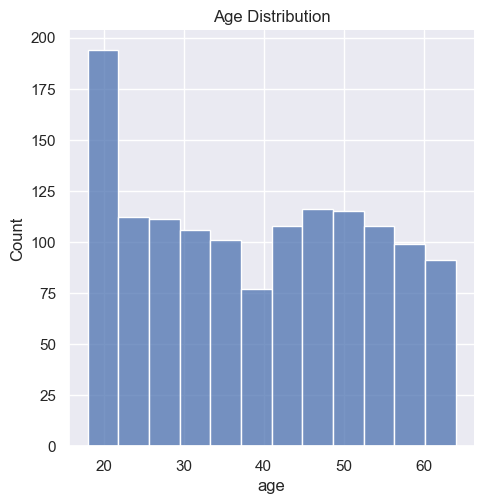

In [54]:
sns.set_theme()
plt.figure(figsize=(6,6))
sns.displot(insurance_dataset['age'])
plt.title('Age Distribution')
plt.show()

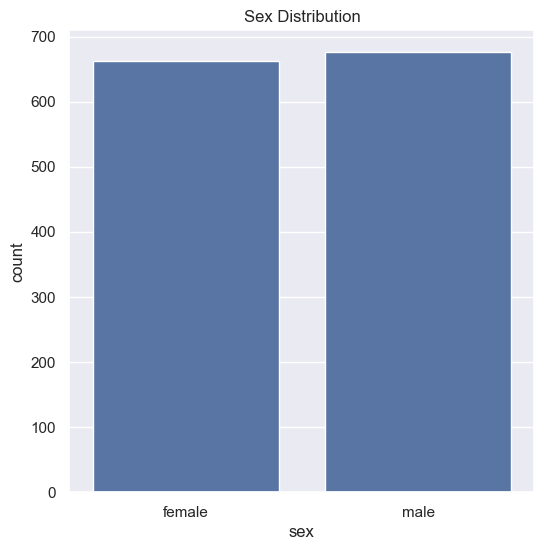

In [55]:
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data=insurance_dataset)
plt.title('Sex Distribution')
plt.show()

<Figure size 1200x1200 with 0 Axes>

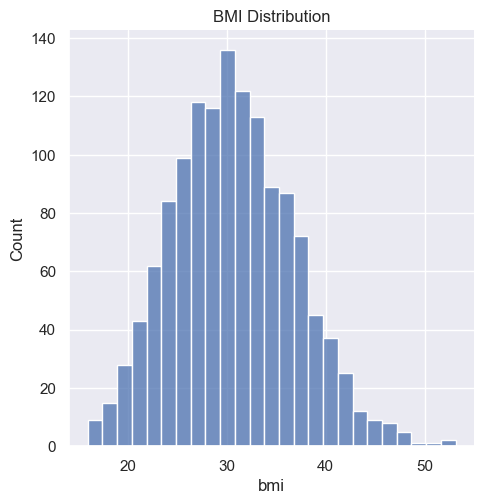

In [56]:
insurance_dataset['sex'].value_counts()
plt.figure(figsize=(12,12))
sns.displot(insurance_dataset['bmi'])
plt.title('BMI Distribution')
plt.show()

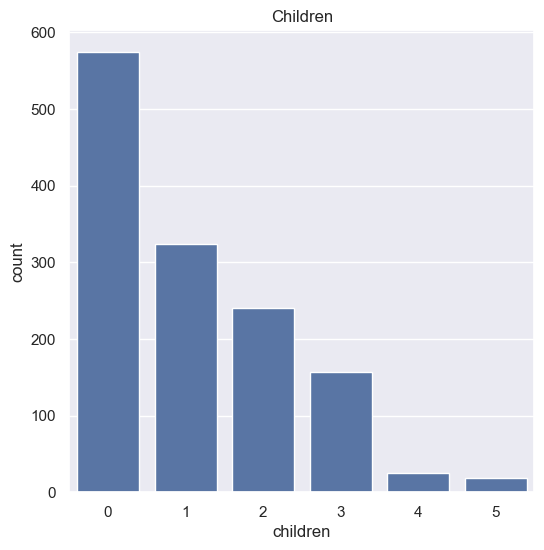

In [57]:
plt.figure(figsize=(6,6))
sns.countplot(x='children', data=insurance_dataset)
plt.title('Children')
plt.show()

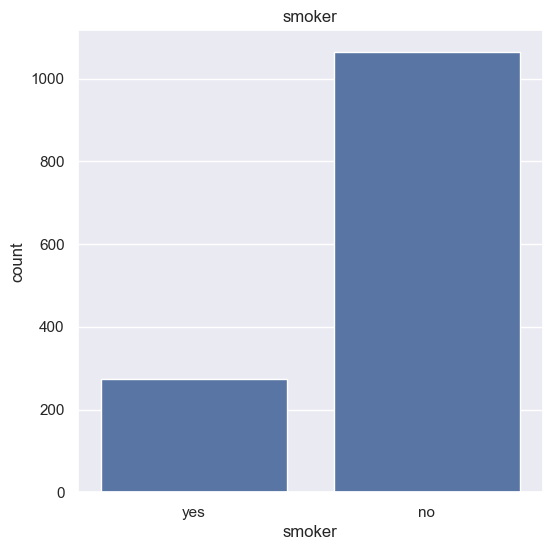

In [58]:
insurance_dataset['children'].value_counts()
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data=insurance_dataset)
plt.title('smoker')
plt.show()

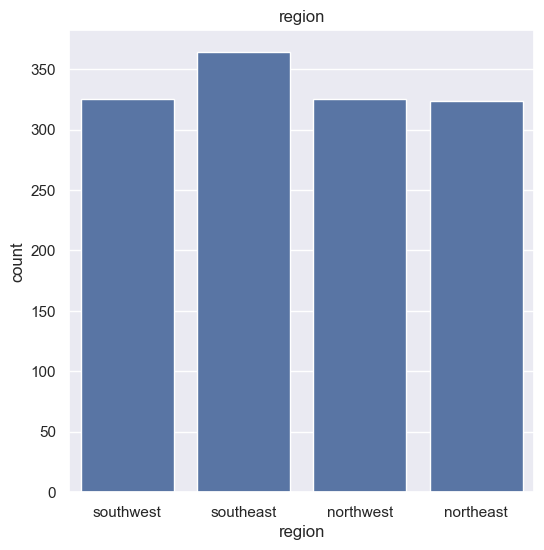

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [59]:
insurance_dataset['smoker'].value_counts()
plt.figure(figsize=(6,6))
sns.countplot(x='region', data=insurance_dataset)
plt.title('region')
plt.show()
insurance_dataset['region'].value_counts()


In [60]:
sex_map = {'male': 0, 'female': 1}
smoker_map = {'yes': 0, 'no': 1}
region_map = {'southeast': 0, 'southwest': 1, 'northeast': 2, 'northwest': 3}

insurance_dataset['sex'] = insurance_dataset['sex'].map(sex_map)
insurance_dataset['smoker'] = insurance_dataset['smoker'].map(smoker_map)
insurance_dataset['region'] = insurance_dataset['region'].map(region_map)

In [61]:
X = insurance_dataset.drop(columns='charges', axis=1)
Y = insurance_dataset['charges']
print(X)
print(Y)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]
0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [62]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


In [63]:
regressor = LinearRegression()

In [64]:
regressor.fit(X_train, Y_train)

LinearRegression()

In [65]:
training_data_prediction =regressor.predict(X_train)
r2_train = metrics.r2_score(Y_train, training_data_prediction)
print('R squared vale : ', r2_train)

R squared vale :  0.751505643411174


In [66]:
print('R squared vale : ', r2_train)
test_data_prediction =regressor.predict(X_test)
r2_test = metrics.r2_score(Y_test, test_data_prediction)
print('R squared vale : ', r2_test)

R squared vale :  0.751505643411174
R squared vale :  0.7447273869684077


In [68]:
import numpy as np

# 🧠 Take inputs from user during cell execution
print("Enter the following details to predict insurance cost:\n")

age = (int(input("Age: ")))
sex = (int(input("Sex (0 = female, 1 = male): ")))
bmi = (float(input("BMI: ")))
children = (int(input("Number of children: ")))
smoker = (int(input("Smoker (0 = yes, 1 = no): ")))
region = (int(input("Region (0 = southeast, 1 = southwest, 2 = northeast, 3 = northwest): ")))

# 🔄 Prepare input for prediction
input_data = (age, sex, bmi, children, smoker, region)
input_data_as_numpy_array = np.asarray(input_data).reshape(1, -1)

# 🧠 Predict using trained model
prediction = regressor.predict(input_data_as_numpy_array)

# 💸 Display prediction
print("\n✅ The estimated insurance cost is: USD", round(prediction[0], 2))


Enter the following details to predict insurance cost:


✅ The estimated insurance cost is: USD 7652.56


c:\Users\ajayr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
